## **Lung Cancer Image Classification**

### **A. Introduction**

- **Name**  : Livia Amanda Annafiah
- **Dataset** : [Lung Cancer Dataset](https://www.kaggle.com/datasets/adityamahimkar/iqothnccd-lung-cancer-dataset/data)
- **Hugging Face**: [Link](https://huggingface.co/spaces/liviamanda/LungCancerPrediction)

---------------------

**Problem Statement**

The hospital faces a major difficulty in accurately diagnosing lung conditions from patient X-ray images. Specifically, it is difficult to predict whether a patient has a malignant, benign, or normal lung case based solely on the X-ray images. This diagnostic uncertainty can lead to delays in treatment, increased patient anxiety, and potentially inappropriate medical interventions. Addressing this issue is crucial to improving patient outcomes and ensuring timely and accurate diagnosis of lung conditions.

**Objective**

The goal of this project is to create a `Convolutional Neural Network (CNN)` model that accurately predicts lung conditions from X-ray images. It will distinguish between malignant, benign, and normal cases, primarily using `accuracy` as the evaluation metric. This aims to improve diagnostics, patient outcomes, and reduce uncertainties in clinical settings through advanced computer vision techniques.

This notebook focuses on testing the inference dataset.

### **B. Libraries**

The libraries used to test the model are as follows:

In [31]:
# Import Library
import numpy as np
import cv2
import os
from keras.models import load_model
import matplotlib.pyplot as plt

### **C. Data Loading**

First, the data is loaded and the file name is displayed below.

In [32]:
# Define path
folder_path = r'C:\Users\livia\OneDrive\Documents\inference data'

# Create empty dictionary
images = {}

# Loop through all files in the folder and add to dictionary
for filename in os.listdir(folder_path):
    if filename.endswith(('.jpg')):
        image_path = os.path.join(folder_path, filename)
        img = cv2.imread(image_path)
        images[filename] = img

# Print the file names
print('File Name:')
for filename, img in images.items():
    print(f'{filename}')

File Name:
000020_01_01_066.jpg
000020_04_01_116.jpg
000027_05_01_099.jpg
000027_06_01_020.jpg
000747_03_03_172.jpg
001083_09_01_093.jpg


This notebook will process and predict six lung X-ray images. These images will be use to demonstrate the model's capability in medical imaging classification tasks.

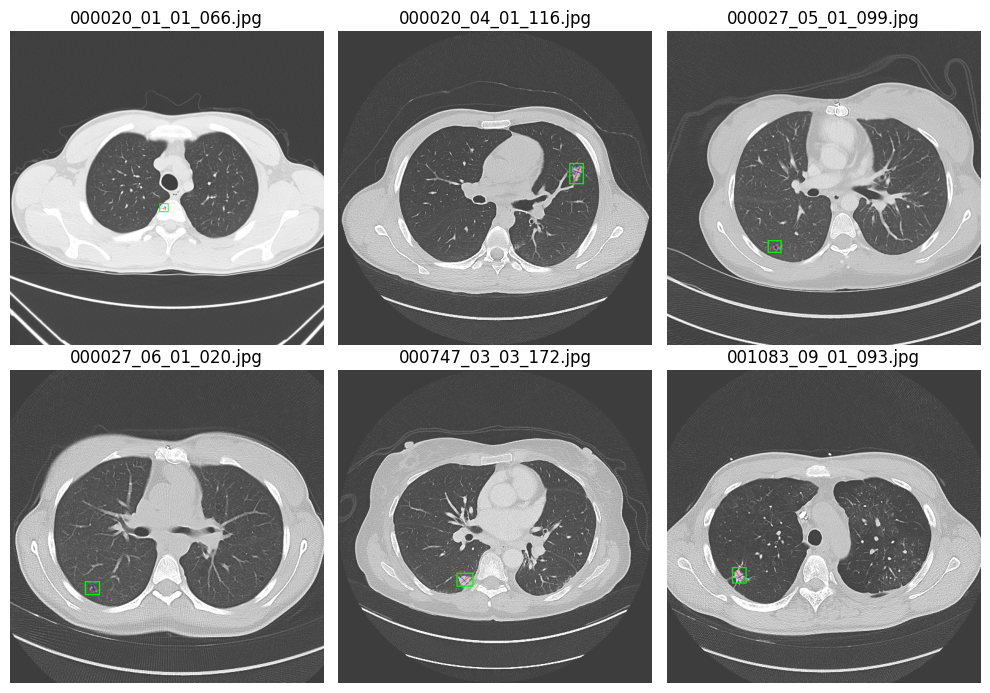

In [33]:
# Create  subplot grid
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.flatten()

# Iterate through the images dictionary and plot each image
for i, (filename, img) in enumerate(images.items()):
    # Plot the image on the corresponding subplot
    axes[i].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[i].set_title(filename)
    axes[i].axis('off') 
    
# Show the plot
plt.tight_layout()
plt.show()

### **D. Feature Engineering**

Before making predictions, the images need to be pre-processed using the same steps outlined in the main notebook.

In [34]:
# Function for preprocessing the image
def preprocessing_denoise(img):
    denoise_img = cv2.medianBlur(img, 1)
    denoise_img = cv2.cvtColor(denoise_img, cv2.COLOR_BGR2RGB)
    return denoise_img

# Apply preprocessing to all images
denoise_img = {filename: preprocessing_denoise(img) for filename, img in images.items()}

# Resize images to 299x299
resized_images = {filename: cv2.resize(img, (299, 299)) for filename, img in denoise_img.items()}

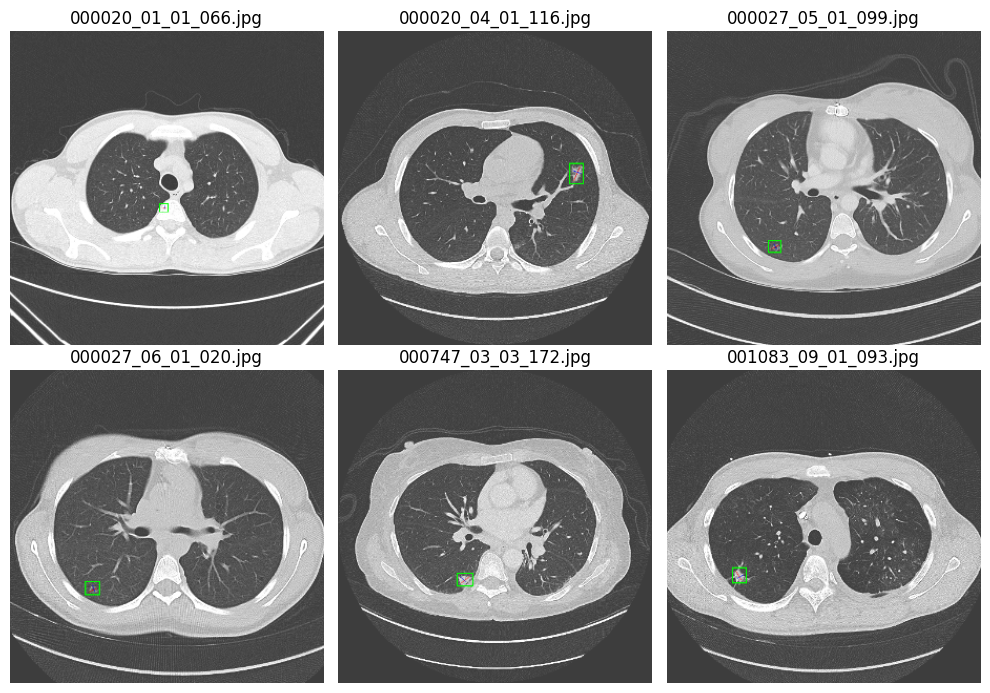

In [35]:
# Create subplot grid for preprocessed images
fig, axes = plt.subplots(2, 3, figsize=(10, 7))
axes = axes.flatten()

# Iterate through the preprocessed_images and plot each preprocessed image
for i, (filename, img) in enumerate(resized_images.items()):
    axes[i].imshow(img)
    axes[i].set_title(filename)
    axes[i].axis('off')

# Show the plot
plt.tight_layout()
plt.show()


These are the results after pre-processing: the images have been slightly blurred, reshaped, and rescaled.

### **E. Model Prediction**

After pre-processing the images, the model is loaded and used to predict the lung conditions from the X-ray images.

In [36]:
# Load the pretrained model
model = load_model('model3.h5')

In [37]:
# Iterate through the preprocessed images and make predictions
for filename, img in resized_images.items():
    
    # Reshape the image to add a batch dimension
    img = img.astype('float32') / 255.0
    img_batch = np.expand_dims(img, axis=0)

    # Make predictions using the model
    predictions = model.predict(img_batch)
    predicted_class = np.argmax(predictions)

    # Print the class based on the predicted_class value
    if predicted_class == 0:
        print(f'{filename}: Benign')
    elif predicted_class == 1:
        print(f'{filename}: Malignant')
    elif predicted_class == 2:
        print(f'{filename}: Normal')
    else:
        print(f'{filename}: Unknown Class')

1/1 [==============================] - 1s 1s/step
000020_01_01_066.jpg: Normal
1/1 [==============================] - 0s 226ms/step
000020_04_01_116.jpg: Normal
1/1 [==============================] - 0s 259ms/step
000027_05_01_099.jpg: Malignant
1/1 [==============================] - 0s 305ms/step
000027_06_01_020.jpg: Malignant
1/1 [==============================] - 0s 252ms/step
000747_03_03_172.jpg: Malignant
1/1 [==============================] - 0s 239ms/step
001083_09_01_093.jpg: Malignant


The model was successfully loaded and used to predict the lung conditions from the X-ray images. The predictions are as follows:

- `000020_01_01_066.jpg`: Normal
- `000020_04_01_116.jpg`: Normal
- `000027_05_01_099.jpg`: Malignant
- `000027_06_01_020.jpg`: Malignant
- `000747_03_03_172.jpg`: Malignant
- `001083_09_01_093.jpg`: Malignant

### **F. Conclusion**

In summary, the model has classified 2 images as Normal and 4 images as Malignant. These results demonstrate the model's capability to predict whether a patient has lung cancer or not.